<a href="https://colab.research.google.com/github/Gh0st116/sklearn-classification/blob/main/car_selling_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Database

In [2]:
url = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Formatting data

In [3]:
switch = {
    "no": 0,
    "yes": 1
}

data.sold = data.sold.map(switch)

print(data.head())

   Unnamed: 0  mileage_per_year  model_year      price  sold
0           0             21801        2000   30941.02     1
1           1              7843        1998   40557.96     1
2           2              7109        2006   89627.50     0
3           3             26823        2015   95276.14     0
4           4              7935        2014  117384.68     1


In [4]:
current_year = datetime.today().year
data['model_age'] = current_year - data.model_year

data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [5]:
data["km_per_year"] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [6]:
data = data.drop(columns= ["Unnamed: 0", "mileage_per_year", "model_year"], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [7]:
X = data.drop(columns= ["sold"], axis=1)
y = data["sold"]

X.head()

,price,model_age,km_per_year
0,30941.02,23,35085.22134
1,40557.96,25,12622.05362
2,89627.50,17,11440.79806
3,95276.14,8,43167.32682
4,117384.68,9,12770.11290


## Train and test data

In [8]:
SEED = 5
np.random.seed(SEED)

train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)

# Model fit

In [9]:
model = LinearSVC()
model.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
predict = model.predict(test_X)

accuracy = accuracy_score(test_y, predict)
print(f"accuracy: {(accuracy * 100):.2f}%")

accuracy: 46.88%


# DummyClassifier

In [11]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_X, train_y)

predict = dummy_stratified.predict(test_X)

accuracy = accuracy_score(test_y, predict)
print(f"accuracy dummy stratified: {(accuracy * 100):.2f}%")

accuracy dummy stratified: 58.00%


In [12]:
dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(train_X, train_y)

accuracy = dummy_most_frequent.score(test_X, test_y)
print(f"accuracy dummy most frequent: {(accuracy * 100):.2f}%")

accuracy dummy most frequent: 58.00%


# Using SVC and Preprocessing

In [13]:
SEED = 5
np.random.seed(SEED)

raw_train_X, raw_test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)
scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = SVC(gamma='auto')
model.fit(train_X, train_y)

predict = model.predict(test_X)

accuracy = accuracy_score(test_y, predict)
print(f"accuracy: {(accuracy * 100):.2f}%")

accuracy: 77.48%


# Decision Tree and Preprocessing

In [18]:
SEED = 5
np.random.seed(SEED)

train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)

model = DecisionTreeClassifier(max_depth=4)
model.fit(train_X, train_y)

predict = model.predict(test_X)

accuracy = accuracy_score(test_y, predict)
print(f"accuracy: {(accuracy * 100):.2f}%")

accuracy: 79.28%


## Plotting decision tree graph

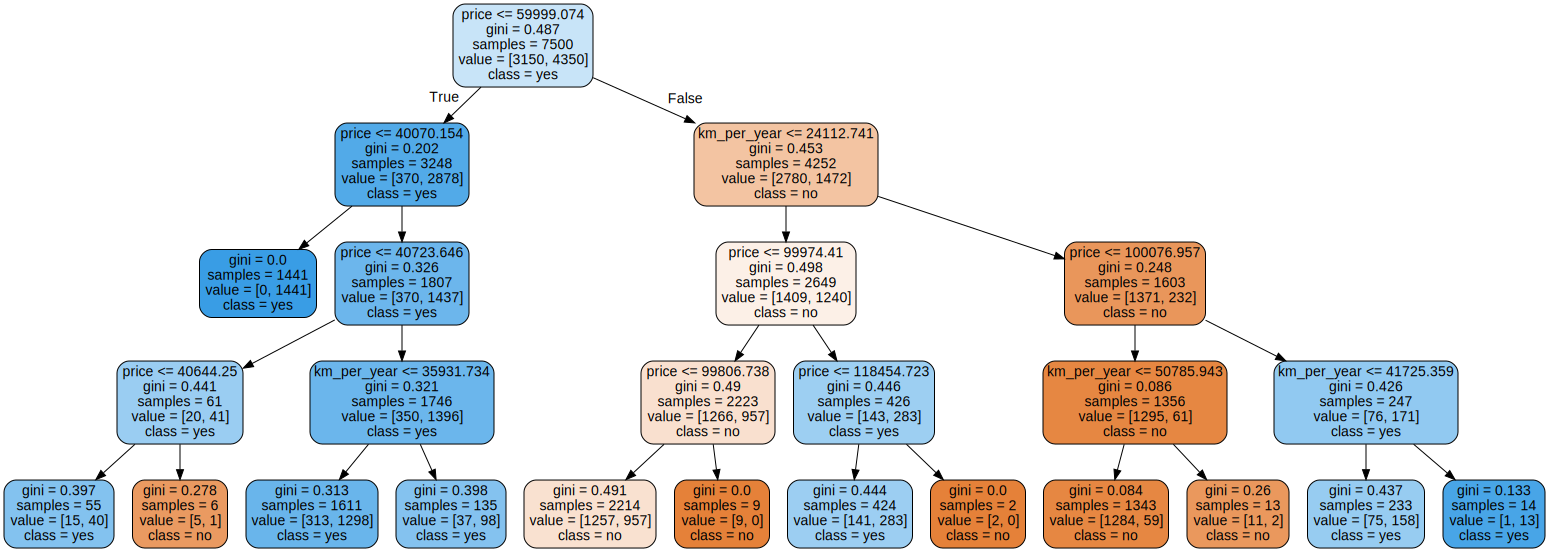

In [19]:
features = X.columns

dot_data = export_graphviz(model,
                           feature_names=features,
                           filled=True,
                           rounded=True,
                           class_names=["no", "yes"])

graph = graphviz.Source(dot_data)
graph